In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
root = "C:\\Users\\mehme\\OneDrive\\Masaüstü\\Cinsiyet_CNN\\"

In [14]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:

train_gen=train_datagen.flow_from_directory(root + 'Training',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [16]:
valid_gen=test_datagen.flow_from_directory(root +'Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 11649 images belonging to 2 classes.


In [17]:
kernel_s=(3,3) # The size of kernel

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)      

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [20]:
checkpointer = ModelCheckpoint(filepath=root +"cinsiyet_model.h5", verbose=1, save_best_only=True)

In [21]:
history=model.fit(train_gen,steps_per_epoch=70,epochs=30,
                  validation_data=valid_gen,validation_steps=50, callbacks=[checkpointer], verbose=2)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.60704, saving model to C:\Users\mehme\OneDrive\Masaüstü\Cinsiyet_CNN\cinsiyet_model.h5
70/70 - 186s - loss: 0.7264 - acc: 0.5170 - val_loss: 0.6070 - val_acc: 0.7125 - 186s/epoch - 3s/step
Epoch 2/30

Epoch 00002: val_loss improved from 0.60704 to 0.59829, saving model to C:\Users\mehme\OneDrive\Masaüstü\Cinsiyet_CNN\cinsiyet_model.h5
70/70 - 189s - loss: 0.7059 - acc: 0.6170 - val_loss: 0.5983 - val_acc: 0.7383 - 189s/epoch - 3s/step
Epoch 3/30

Epoch 00003: val_loss improved from 0.59829 to 0.44900, saving model to C:\Users\mehme\OneDrive\Masaüstü\Cinsiyet_CNN\cinsiyet_model.h5
70/70 - 192s - loss: 0.6220 - acc: 0.7176 - val_loss: 0.4490 - val_acc: 0.7979 - 192s/epoch - 3s/step
Epoch 4/30

Epoch 00004: val_loss did not improve from 0.44900
70/70 - 193s - loss: 0.5409 - acc: 0.7396 - val_loss: 0.5179 - val_acc: 0.7617 - 193s/epoch - 3s/step
Epoch 5/30

Epoch 00005: val_loss did not improve from 0.44900
70/70 - 219s - loss: 0.534

<Figure size 432x288 with 0 Axes>

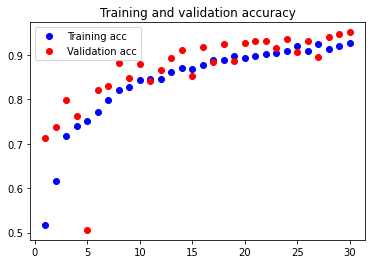

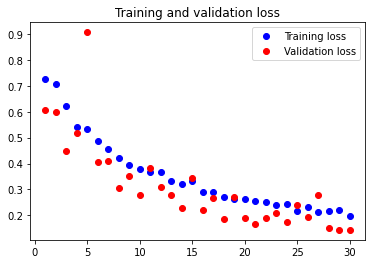

<Figure size 432x288 with 0 Axes>

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [2]:
from tensorflow import keras
model_best = load_model('./cinsiyet_model.h5')


kadin


array([[0.0418438]], dtype=float32)

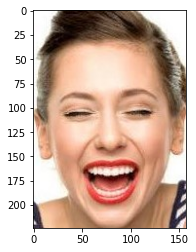

In [3]:
image_path ="./images/sinirli_verme_yakin.jpg"
test_image_original = image.load_img(image_path) # orjinal renkli görüntü

test_image = image.load_img(image_path, target_size=(250, 250), grayscale=False)
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
img_preprocessed = preprocess_input(test_data)
prediction = model_best.predict(img_preprocessed)
prediction
if(prediction[0] == 1):
    print("erkek")
else:
    print("kadin")

plt.imshow(test_image_original)
prediction